In [1]:
import geopy
from geopy.geocoders import Nominatim
import geopy.distance
import csv
geolocator = Nominatim(user_agent="user1")
import pandas as pd
import geopandas as gp
import shapely
from fiona.crs import from_epsg
from shapely.geometry import Point
import matplotlib.pyplot as plt
import urllib
import zipfile
from zipfile import ZipFile
import os
import io

In [2]:
url = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile'
urllib.request.urlretrieve(url, "file.zip")
zip1 = ZipFile('file.zip')
zip1.extractall()
for x in os.listdir():
    if x.endswith('.shp'):
        files=x
nyc=gp.GeoDataFrame.from_file(files)


Username: zoe
Password: lovescats
What is your starting address? 47 west 4th street new york
What is your destination address? 370 jay street brooklyn


/Users/zoemartiniak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  after removing the cwd from sys.path.
/Users/zoemartiniak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  """


Your buddy is starting at:  NYU  West 4th Street  and is heading towards a similar destination.


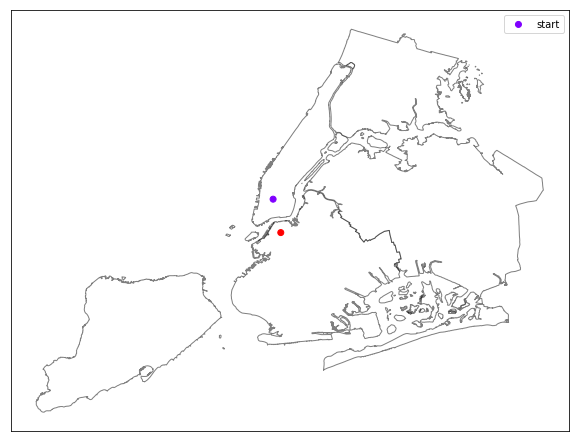

In [6]:
def map1(x):
    start_coord = (x['start_lat'], x['start_lon']) ## searches database for start locations
    end_coord = (x['end_lat'], x['end_lon']) ## searches database for end locations
    start_dist = geopy.distance.vincenty(start_coord, user_start).mi
    end_dist = geopy.distance.vincenty(end_coord, user_end).mi
    return (x['userid'],start_dist,end_dist, start_dist + end_dist, 
            x['start_address'],start_coord,end_coord)
    
userid = input('Username: ')
userid = input('Password: ')
startloc = input('What is your starting address? ')
endloc = input('What is your destination address? ')


start_lat = geolocator.geocode(startloc).latitude
start_lon = geolocator.geocode(startloc).longitude
user_start = (start_lat,start_lon)
end_lat = geolocator.geocode(endloc).latitude
end_lon = geolocator.geocode(endloc).longitude 
user_end = (end_lat, end_lon)



filename = 'traveldatabase.csv'
with open(filename, 'r') as fi:
    reader = csv.DictReader(fi)
    output1 = list(map(map1, reader))
    
output1[1]
usermatch = sorted(output1, key=lambda tup: (tup[3]) )[0]
print('Your buddy is starting at: ', usermatch[4].split(',')[0],
      usermatch[4].split(',')[1],
      ' and is heading towards a similar destination.')

self = pd.DataFrame()
match = pd.DataFrame()
self['lat']=start_lat, end_lat
match['lat']=float(usermatch[5][0]), float(usermatch[6][0])
self['lon']=start_lon, end_lon
match['lon']=float(usermatch[5][1]), float(usermatch[6][1])
self['lonlat']=list(zip(self.lon,self.lat))
self['geometry'] = self[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
points = gp.GeoDataFrame(self)


f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
nyc.plot(ax=ax, color = 'w',edgecolor='k',alpha=0.5, legend=True)
points.plot(ax=ax, cmap='rainbow')
titles = ('start','end')
plt.legend(titles)
plt.show()